<a href="https://colab.research.google.com/github/maushamkumar/Think-Stats/blob/main/PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
l = []
for i in range(10000): # We are rolling a dice for 10000 times
  l.append(random.randint(1,6))

In [ ]:
l[:5]

[2, 3, 1, 2, 5]

In [ ]:
s = (pd.Series(l).value_counts()/pd.Series(l).value_counts().sum()).sort_index()
# pd.Series(l).value_counts() => This code tells us how many times each element has occurred in l.,
# pd.Series(l).value_counts().sum()=> The total number of value that we have
# Once I have done this. Now I have got the probability of each element.

In [ ]:
s

1    0.1650
2    0.1702
3    0.1712
4    0.1650
5    0.1660
6    0.1626
Name: count, dtype: float64

<Axes: >

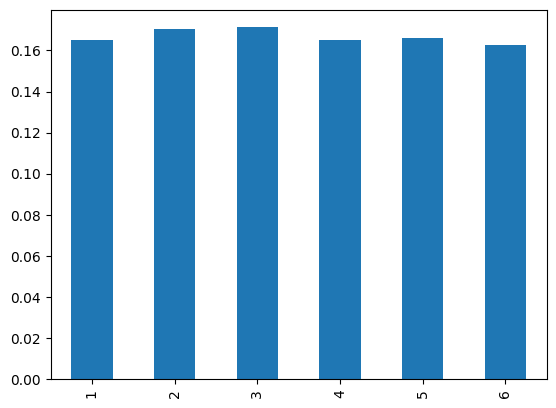

In [ ]:
s.plot(kind='bar')

This is the PMF of this random experiment.

### Let's do for two dices

In [ ]:
l = []
for i in range(10000):
  a = (random.randint(1,6))
  b = (random.randint(1,6))
  l.append(a+b)

In [ ]:
l[:5]

[6, 7, 8, 8, 7]

In [ ]:
pd.Series(l).value_counts()/pd.Series(l).value_counts().sum() # We got the probabilities

7     0.1694
8     0.1422
6     0.1396
5     0.1122
9     0.1112
10    0.0820
4     0.0806
11    0.0561
3     0.0554
12    0.0257
2     0.0256
Name: count, dtype: float64

In [ ]:
M = (pd.Series(l).value_counts()/pd.Series(l).value_counts().sum()).sort_index()

<Axes: >

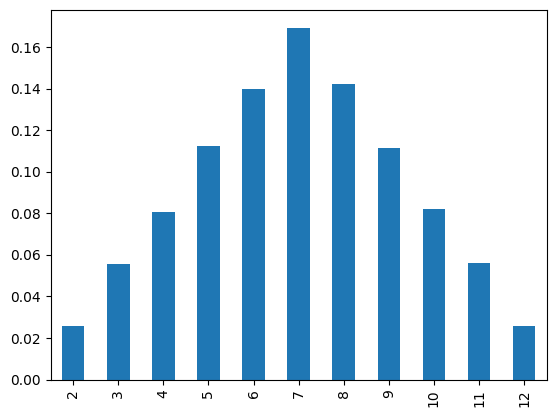

In [ ]:
M.plot(kind='bar')

### Let's do this coin tossing!

In [ ]:
L = []
for i in range(10000):
  L.append(random.randint(0,1))

In [ ]:
L[:5]

[0, 1, 1, 0, 0]

In [ ]:
P = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

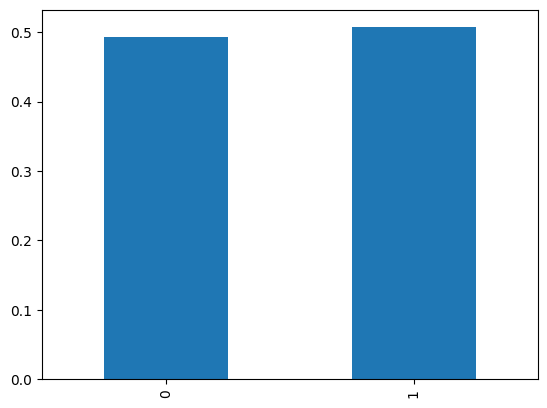

In [ ]:
P.plot(kind='bar')

In [ ]:
# do it for 5 dices

In [ ]:
np.cumsum(M)

0     0.25325
1     0.50000
2     0.51280
3     0.54050
4     0.58080
5     0.63690
6     0.70670
7     0.79140
8     0.86250
9     0.91810
10    0.95910
11    0.98715
12    1.00000
Name: count, dtype: float64

<Axes: >

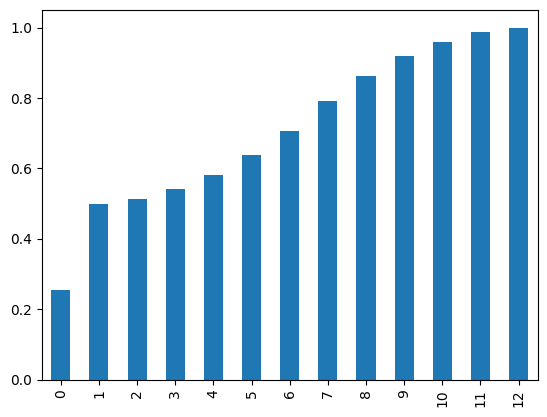

In [ ]:
np.cumsum(M).plot(kind='bar')

Choose 9 as x. Then y tells us what is the probability of being 9 or less then 9. which is 90%

choose 5 as x. Then y tells us what is the probability of being 5 or less then 5. which is 0.6%

# Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [ ]:
sample = normal(loc = 50, scale = 5, size = 1000) # We generated noramally distributed data.

(array([  1.,  12.,  34., 135., 277., 284., 186.,  52.,  15.,   4.]),
 array([29.77845172, 33.67602121, 37.5735907 , 41.47116019, 45.36872968,
        49.26629917, 53.16386866, 57.06143815, 60.95900764, 64.85657713,
        68.75414662]),
 <BarContainer object of 10 artists>)

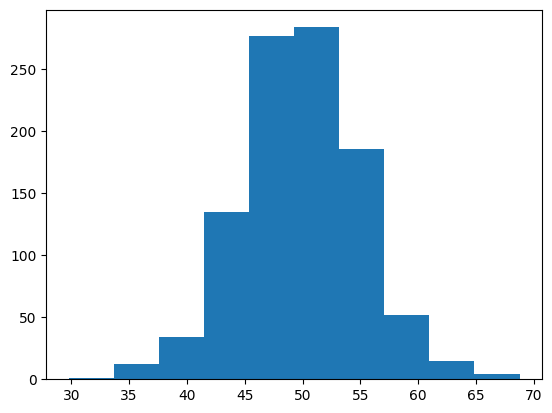

In [ ]:
# Plot histogram to understand the distribution of data (Here we know the distribution of the data but let's assume we don't know anything about the data)
plt.hist(sample, bins=10)

This data looks like normal distribution but not exactly normal distribution. So, we take the assumption this is normally distributed data.

In [ ]:
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
# Fit the distribution with the above parameter
# we are taking the equation of normal distribution mu = mean of this data and sigma = std of this data
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [ ]:
values = np.linspace(sample.min(), sample.max(), 100) # We are generating 100 data points between range of min and max. and every data point we are passing inside the formula of normal distribution.

In [ ]:
sample.min()

29.778451724560053

In [ ]:
sample.max()

68.75414661967213

In [ ]:
prob_density = [dist.pdf(value) for value in values] # Now we have probability density for values (where we )

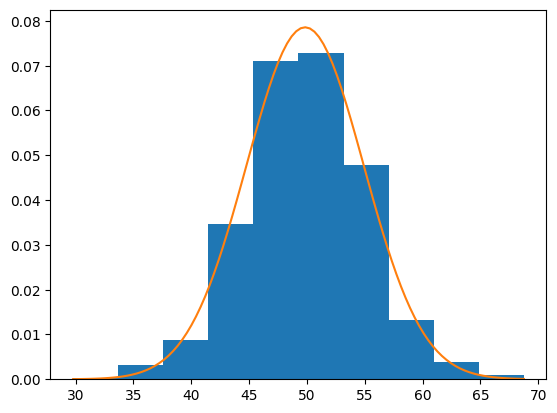

In [ ]:
# Plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, prob_density)

This graph depends on two things which is mu and sigma. why bcz we are using normal distribution as reference.

The parameter should be very close to the population parameter

In [ ]:
import seaborn as sns

<ipython-input-44-8e9f4a82ec05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

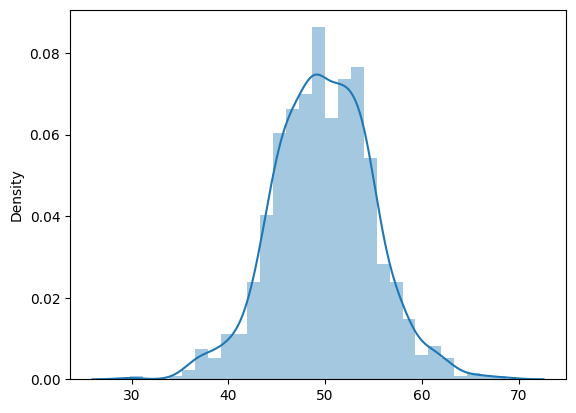

In [ ]:
sns.distplot(sample)

# KDE

In [ ]:
# Generate a sample
sample1 = normal(loc = 20, scale = 5, size = 300)
sample2 = normal(loc = 40, scale = 5, size = 700)
sample = np.hstack((sample1, sample2))

In [ ]:
sample

array([20.06511678, 24.06789129, 14.57586509, 15.7871295 , 15.56140945,
       16.1080729 , 20.71049481, 19.66436016, 18.07463326, 21.99590154,
       12.48981318, 17.70544876,  9.93638048, 24.83326379, 23.67233302,
       17.58659701, 18.32373001, 22.53049183, 26.84372097, 38.81708214,
       11.59338712,  2.89013328, 20.3676403 , 24.07363855, 15.27952718,
        8.61749977, 16.00356994, 19.5571376 , 23.7013443 , 13.73835896,
       31.11050344, 24.39661587, 17.17277982, 21.27663351, 19.17613015,
       21.53946404,  8.91528053, 18.2524811 , 20.13264474, 14.19749444,
       14.607082  , 11.12100001,  8.90856581, 25.46389706, 16.58545421,
       20.45762625, 24.19305641, 19.59562524, 18.29202778, 15.08475934,
       16.72120482, 21.29879806, 13.03371592, 15.04820572, 17.68254594,
       19.99177214, 17.38392193, 24.65252851, 19.01739169, 20.57573504,
       22.65166387, 21.2019116 , 22.67334658,  6.7120514 , 24.81231462,
       27.49094831, 19.97091888, 11.46799048, 22.62638   , 20.57

(array([ 1.,  2.,  4.,  3.,  9.,  2., 13., 14., 20., 18., 22., 23., 26.,
        21., 22., 18., 21., 14., 11., 11., 12.,  7., 13.,  9.,  8.,  7.,
        21., 26., 36., 28., 44., 51., 47., 46., 48., 59., 45., 48., 36.,
        38., 34., 17., 12., 11.,  7.,  7.,  2.,  3.,  2.,  1.]),
 array([ 7.47176426,  8.4183974 ,  9.36503055, 10.31166369, 11.25829683,
        12.20492997, 13.15156312, 14.09819626, 15.0448294 , 15.99146254,
        16.93809568, 17.88472883, 18.83136197, 19.77799511, 20.72462825,
        21.6712614 , 22.61789454, 23.56452768, 24.51116082, 25.45779397,
        26.40442711, 27.35106025, 28.29769339, 29.24432654, 30.19095968,
        31.13759282, 32.08422596, 33.03085911, 33.97749225, 34.92412539,
        35.87075853, 36.81739168, 37.76402482, 38.71065796, 39.6572911 ,
        40.60392425, 41.55055739, 42.49719053, 43.44382367, 44.39045682,
        45.33708996, 46.2837231 , 47.23035624, 48.17698939, 49.12362253,
        50.07025567, 51.01688881, 51.96352196, 52.9101551 ,

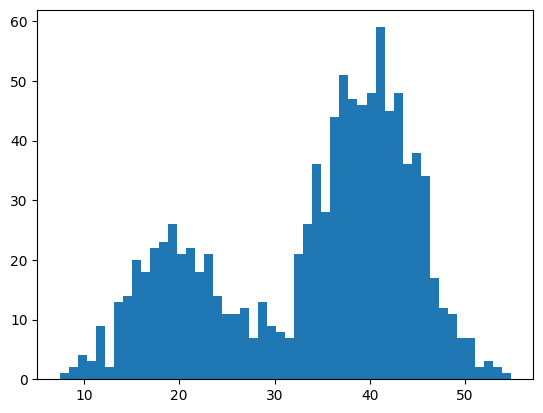

In [ ]:
# Plot histogram bins = 50
plt.hist(sample, bins =50)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth = 3, kernel = 'gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1)) # Every ML algorithm works on 2D data

model.fit(sample)

KernelDensity(bandwidth=3)

In [ ]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

In [ ]:
probabilities = model.score_samples(values) # Basically this is new data and for this data, we are calculating the probabilities (means y values)
probabilities = np.exp(probabilities) # This is an additional step we have to find exp of probability density (probability were in log-normal)

**Score_samples(values)** return the log-density of the input samples values. This is because the **socre_samples()** method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

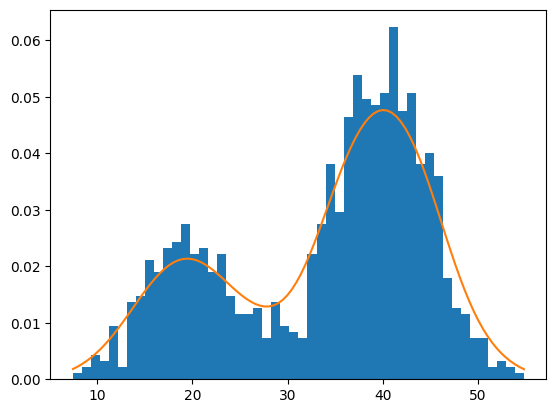

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

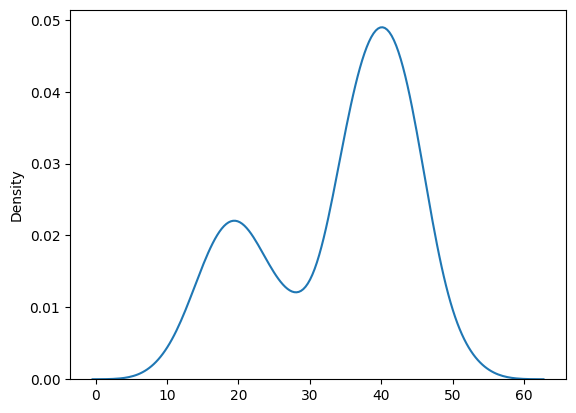

In [ ]:
import seaborn as sns
sns.kdeplot(sample.reshape(1000))

# How to use PDF in Data Science

In [1]:
import seaborn as sns


In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We have to predict the type of flowers. based on these for columns

<Axes: xlabel='petal_length', ylabel='Density'>

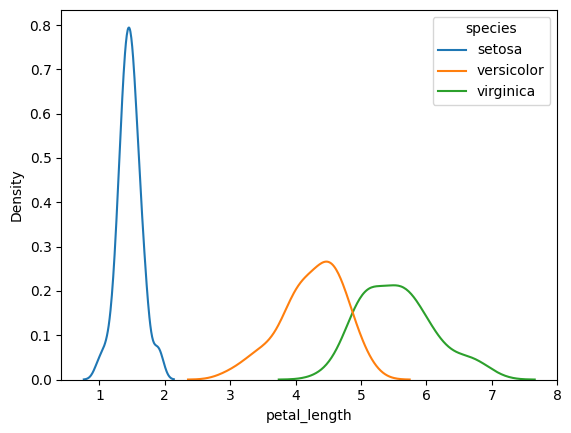

In [5]:

import pandas as pd

# Assuming df is your DataFrame
sns.kdeplot(data=df, x='petal_length', hue='species')


we have plotted kde plot based on setosa, versicolor, virginica

<Axes: xlabel='petal_width', ylabel='Density'>

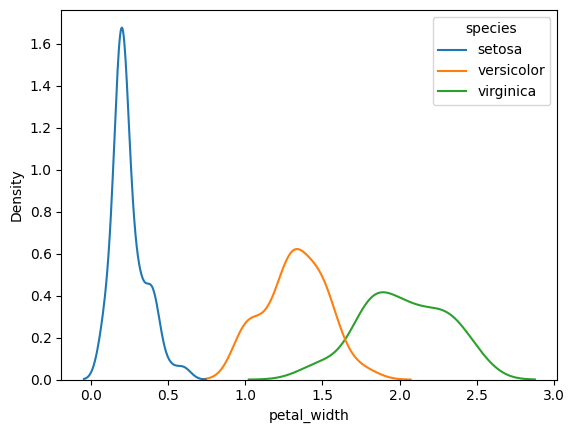

In [6]:
sns.kdeplot(data=df, x='petal_width', hue='species')

<Axes: xlabel='sepal_length', ylabel='Density'>

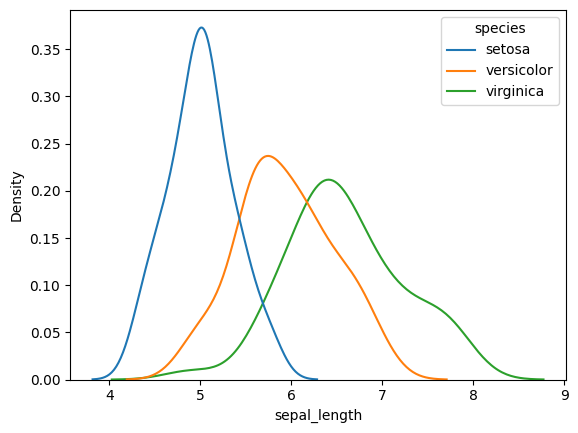

In [7]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

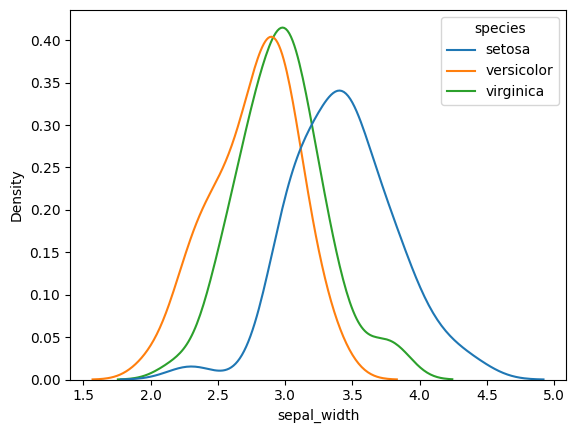

In [8]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

Based on these four graphs you can only keep two columns which one would be?
it would be petal length and petal width because you easily understand the data. these two are able to differentiate between the three species.

In [13]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/


!kaggle datasets download -d saimanideep1999/tatanic-dataset1







cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/saimanideep1999/tatanic-dataset1
License(s): unknown
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 35.3MB/s]


In [14]:
!unzip /content/tatanic-dataset1.zip -d /content/

Archive:  /content/tatanic-dataset1.zip
  inflating: /content/train.csv      


In [15]:
df = pd.read_csv('/content/train.csv', encoding='latin1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

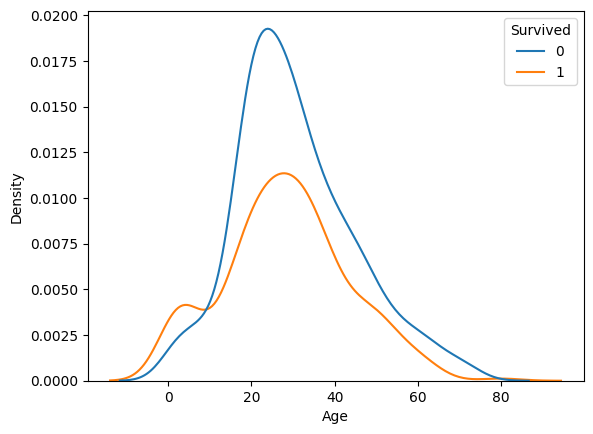

In [18]:
sns.kdeplot(data=df, x='Age', hue='Survived')

Base on this kde plot we can see if you are a child then you have more chances of survival compared to dead.